In [1]:
import numpy as np
import matplotlib.pyplot as plt
print(np.round((13/6)%1, decimals = 1))
#pip install qiskit!
from qiskit import *
print("test")
# converting between decimal and number old
def bin_2_dec(num_list):
  #change binary number in form of list of 0/1 to decimal number
  return int("".join((str(i)) for i in num_list),2)


def dec_2_bin(num_list):
  #change binary number in form of list of 0/1 to decimal number
  return [int(a) for a in format(num_list, '03b')]

0.2
test


[[0. 3. 3. 3.]
 [0. 2. 0. 0.]
 [3. 0. 2. 0.]
 [3. 0. 0. 3.]]


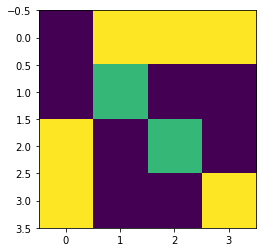

In [2]:
# lets make the obstacle map first
# lets scale everything down to 4 qbits
N = 4
obstacle_map = np.zeros((N,N))

ships = [(0, 1), (0,2), (0,3), (3,3), (3,0), (2,0)]
bombs = [(1,1), (2,2)]
v, w = 0, 0
for row in obstacle_map:
    v += 1
    for col_part in row:
        w += 1
        if tuple([(v-1), (w-1) % N]) in ships:
            obstacle_map[v-1, (w-1) % N] = 3
                                                     ###REFERENCE###
        if tuple([(v-1), (w-1) % N]) in bombs:     # ships == yelloe
            obstacle_map[v-1, (w-1) % N] = 2     #bombs == cyan
                                                   # water == purple
                                               

plt.imshow(obstacle_map)
print(obstacle_map)
# Imshow has interesting axis but I think this gets it right...

In [3]:
from qiskit import IBMQ

TOKEN = "3f1689653c7b5cfeb01245077d611bca6abbe7a55d4927b384fab44dc33a8527637b28de5d993ff4491795f17269afcc7ae899e1217b02b7499fa7cc057b2ebf"
IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()
#SIMULATOR WITH NOISE
provider = IBMQ.get_provider(hub='ibm-q')
#backend = provider.get_backend('ibmq_quito')
#backend = provider.get_backend('ibmq_lima') ##maintance

provider.backends()

configrc.store_credentials:WARNING:2022-04-25 11:44:51,741: Credentials already present. Set overwrite=True to overwrite.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [4]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='niels-bohr-inst', project='main')>]

In [5]:
# tutorial: https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html


#FAST QC
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_quito')
#backend = provider.get_backend('ibmq_lima') ##maintance


#JAKARTA
#provider = IBMQ.get_provider(hub='ibm-q')
#backend = provider.get_backend('ibmq_jakarta')
#backend = provider.get_backend('ibmq_lima') ##maintance

#simulator
backend_sim = Aer.get_backend('statevector_simulator')
backend = Aer.get_backend('statevector_simulator')

In [6]:
from qiskit import Aer

nshots = 1
# Run the quantum circuit on a statevector simulator backend
backend_sim = Aer.get_backend('statevector_simulator')

import pygame
pygame.init()

pygame 2.1.2 (SDL 2.0.18, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


(5, 0)

In [7]:

import time
font = pygame.font.Font(None, 50)
circuit_size = 4    # please give even numbers!
# Open a new window
size = (500, 600)
screen = pygame.display.set_mode(size)
pygame.display.set_caption("Quantum Bomb Splash")

gameOver = False
 
# The clock will be used to control how fast the screen updates
clock = pygame.time.Clock()
 
#Initialise score
score = 0
 

#initilize to be a missile position x_qubits=[1,1,0]
circuit_size = 4    # please give even numbers!
circ = QuantumCircuit(circuit_size)

#user map, the map that the user sees; starts out as empty 4x4 with missile at (0,0)
user_map = np.zeros((4,4)) - 1



target_map = np.zeros((4,4))
target_map[0,0] = 1



#obstacle map
obstacle_map = obstacle_map
nshots = 1024
L = 1

gates = 0

score = 0


#NEW PART
dt = 0
keys_enabled = True


run_once = 0
##############
# -------- Main Program Loop -----------
while not gameOver:
    keys = pygame.key.get_pressed()
    
    
  ############NEW#############  
    if not keys_enabled:
        if dt > 200:
            dt = 0
            keys_enabled = True
    ############NEW#############    
    
    pygame.display.set_caption('Quantum Bomb Splash')
    # --- Main event loop
    for event in pygame.event.get(): # User did something
        if event.type == pygame.QUIT: # If user clicked close
              gameOver = True # Flag that we are done so we exit this loop
        elif event.type==pygame.KEYDOWN:
                if event.key==pygame.K_x: #Pressing the x Key will quit the game
                     gameOver = True
     
      # Lets make the 4 by 4 matrix
            # we use the sizes to draw as well as to do our "steps" in the loops. 
    grid_node_width = 125  #size of single square
    grid_node_height = 125


    def createSquare(x, y, color):
        pygame.draw.rect(gridDisplay, color, [x, y, grid_node_width, grid_node_height ])
        
        

    def createCircle(x, y, color,r):
        pygame.draw.circle(gridDisplay, color, [x+grid_node_width/2, y+grid_node_width/2], r*grid_node_width/4)

    gridDisplay = pygame.display.set_mode((500, 600))
    #pygame.display.get_surface().fill((200, 200, 200))  # background
    def visualizeGrid(matrix):
        #print(matrix)
                
        y = 0  # we start at the top of the screen
        for row in matrix:
            x = 0 # for every row we start at the left of the screen again
            for item in row:
                if item == 1:
                    createSquare(x, y, (0, 200, 0))         #MISSILE (BLACK)
                    
                elif item == 3:
                    createSquare(x, y, (15,240,0))      #BOAT  (GREEN)
                    
                elif item == 2:
                    createSquare(x, y, (255,0,0))      #BOMB (RED)
                elif item < 0:
                    createSquare(x, y, (0,0,50)) 
                else:
                    createSquare(x, y, (0, 0, 128))  # WATER (BLUE) ==-.75

                x += grid_node_width # for every item/number in that row we move one "step" to the right
            y += grid_node_height   # for every new row we move one "step" downwards
        
    def visualizeTarget(matrix):
    #print(matrix)

        y = 0  # we start at the top of the screen
        for row in matrix:
            x = 0 # for every row we start at the left of the screen again
            for item in row:
                createCircle(x,y,(0,255,255),item)

                x += grid_node_width # for every item/number in that row we move one "step" to the right
            y += grid_node_height   # for every new row we move one "step" downwards


    
    # Keys

    if keys[pygame.K_1] and keys_enabled:
        print("H Gate applied to qubit 1")
        circ.h(0)
        gates+=1
        dt = 0
        keys_enabled = False

    if keys[pygame.K_2] and keys_enabled:
        #qbit_runner2 += 1
        #if (np.round((qbit_runner2/L)%1, decimals = 2) == 0):
        gates+=1
        circ.h(1)
        print("H Gate applied to qubit 2")
        dt = 0
        keys_enabled = False

    if keys[pygame.K_3] and keys_enabled:
        #qbit_runner3 += 1
        #if (np.round((qbit_runner3/L)%1, decimals = 2) == 0):
        gates+=1
        circ.h(2)
        print("H Gate applied to qubit 3")
        dt = 0
        keys_enabled = False

    if keys[pygame.K_4] and keys_enabled:
        #qbit_runner4 += 1
        #if (np.round((qbit_runner4/L)%1, decimals = 2) == 0):
        gates+=1
        circ.h(3)
        print("H Gate applied to qubit 4")
        dt = 0
        keys_enabled = False

    # Lets also add CNOT keys QAZ
    if keys[pygame.K_q] and keys_enabled:
        #qbit_runnerQ += 1
       # if (np.round((qbit_runnerQ/L)%1, decimals = 2) == 0):
        gates+=1
        circ.cx(0, 1)
        print("CNOT Gate applied to qubit 2 with control 1")
        dt = 0
        keys_enabled = False

    if keys[pygame.K_a] and keys_enabled:
        #qbit_runnerA += 1
        #if (np.round((qbit_runnerA/L)%1, decimals = 2) == 0):
        gates+=1
        circ.cx(1, 2)
        print("CNOT Gate applied to qubit 3 with control 2")
        dt = 0
        keys_enabled = False

    if keys[pygame.K_z] and keys_enabled:
        #qbit_runnerZ += 1
        #if (np.round((qbit_runnerZ/L)%1, decimals = 2) == 0):
        gates+=1
        circ.cx(2, 3)
        print("CNOT Gate applied to qubit 4 with control 3")
        dt = 0
        keys_enabled = False

        
        
    if keys[pygame.K_RIGHT] and keys_enabled:
        #qbit_runnerZ += 1
        #if (np.round((qbit_runnerZ/L)%1, decimals = 2) == 0):
        gates+=2
        circ.cx(2,3)
        circ.x(2)
        print("We go right")
        dt = 0
        keys_enabled = False

        
    if keys[pygame.K_DOWN] and keys_enabled:
        #qbit_runnerZ += 1
        #if (np.round((qbit_runnerZ/L)%1, decimals = 2) == 0):
        gates+=2
        circ.cx(0,1)
        circ.x(0)
        print("CNOT Gate applied to qubit 4 with control 3")
        dt = 0
        keys_enabled = False

        
    if keys[pygame.K_LEFT] and keys_enabled:
        #qbit_runnerZ += 1
        #if (np.round((qbit_runnerZ/L)%1, decimals = 2) == 0):
        gates+=2
        circ.x(2)
        circ.cx(2,3)
        print("We go left")
        dt = 0
        keys_enabled = False

        
    if keys[pygame.K_UP] and keys_enabled:
        #qbit_runnerZ += 1
        #if (np.round((qbit_runnerZ/L)%1, decimals = 2) == 0):
        gates+=2
        circ.x(0)
        circ.cx(0,1)
        print("CNOT Gate applied to qubit 4 with control 3")
        dt = 0
        keys_enabled = False



 # Everytime we click space we show the new usermap
    if keys[pygame.K_SPACE] and keys_enabled:
        print("Screen Updated")
        job = backend_sim.run(circ, shots=nshots)
        result = job.result()
        counts = result.get_counts()     # dictionary of each missile position accompanied by its count
   
        posx = [bin_2_dec(c[2:]) for c in counts.keys()]
        posy = [bin_2_dec(c[:2]) for c in counts.keys()]
        print(counts)
        probs = [x for x in counts.values()]


        # Now lets update the user_map
        target_map = np.zeros((N,N))
        for n,x in enumerate(posx):
            target_map[posx[n]%4,posy[n]%4] = probs[n]
        print(target_map)
        dt = 0
        keys_enabled = False
    ##### NEED TO CHECK UP ON QUBITS LATER CLEARLY  ########


    #When we hit space we want the state to collapse onto one point thats interacts with our obstacles map
    if keys[pygame.K_RETURN] and keys_enabled:
        print("MISSILE FIRED!")
        circ.measure_all()
            
        text_wait = font.render("AIMING...", 1, (255,255,255))
        screen.blit(text_wait, (150,300))
        
        pygame.display.update()
        pygame.time.delay(1000)
 
        job = backend.run(circ, shots= 1)
        result = job.result()
        counts = result.get_counts()     # dictionary of each missile position accompanied by its count
        print(counts)
        posx = [bin_2_dec(c[2:]) for c in counts.keys()]
        posy = [bin_2_dec(c[:2]) for c in counts.keys()]
        probs = [x/1 for x in counts.values()]
        
        hit = obstacle_map[posx[0],posy[0]]
        user_map[posx[0],posy[0]] = hit
        
        
        if hit==2:
            score-=10
        elif hit==3:
            score+=5
        
        
        ## Update user-map
        #user_map = np.zeros((N,N))
        #for n,x in enumerate(posx):
        #    user_map[posx[n]%4,posy[n]%4] = probs[n]
        
        target_map = np.zeros((4,4))
        target_map[posx[0],posy[0]]  = 1
        

        # To get the user_map with bombs/ships revealed we add the two
        circ = QuantumCircuit(circuit_size)
        
        for c in counts.keys():
            print(c)
            for n,k in enumerate(c):
                print(k)
                if k=="1":
                    circ.x(3-n)
        dt = 0
        gates=0
        keys_enabled = False
    
    
    if score < 0 and run_once == 0:
        #text_wait = font.render("You Died :( ... or did you...)", 1, (255,255,255))
        #screen.blit(text_wait, (150,300))
        
        #pygame.display.update()
        #pygame.time.delay(2200)
        #gameOver == True
        run_once += 1
        print("YOU LOST :(")
        
    if score == 30 and run_once == 0:
        #text_wait = font.render("YOU WON :) !", 1, (255,255,255))
        #screen.blit(text_wait, (150,300))
        
        #pygame.display.update()
        #pygame.time.delay(2200)
        #gameOver == True
        run_once += 1
        print("YOU WON :)!")
        
    if gates > 5 and run_once == 0:
        print("GAME OVER;  YOU PLACED TO MANY GATES!")
    
    text = font.render("SCORE: "+str(score), 1, (255,255,255))
    screen.blit(text, (150,500))
    
    
    text2 = font.render("GATES: "+str(gates), 1, (255,255,255))
    screen.blit(text2, (150,550))
    ####
    
    visualizeGrid(user_map)
    
    visualizeTarget(target_map)
    pygame.display.update()

    # --- Limit to X frames per second
    clock.tick(60)
    dt += clock.tick(60)
    
pygame.quit()

H Gate applied to qubit 1
Screen Updated
{'0000': 0.5, '0001': 0.5}
[[0.5 0.  0.  0. ]
 [0.5 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
MISSILE FIRED!
{'0000': 1}
0000
0
0
0
0
Screen Updated
{'0000': 1.0}
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
We go right
Screen Updated
{'0100': 1.0}
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
CNOT Gate applied to qubit 4 with control 3
Screen Updated
{'0101': 1.0}
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
MISSILE FIRED!
{'0101': 1}
0101
0
1
0
1
YOU LOST :(
H Gate applied to qubit 1
H Gate applied to qubit 1
Screen Updated
{'0101': 1.0}
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Screen Updated
{'0101': 1.0}
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
H Gate applied to qubit 3
Screen Updated
{'0001': 0.5, '0101': 0.5}
[[0.  0.  0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]
CNOT Gate applied to qubit 2 with control 1
Screen Updated
{

In [8]:
circ.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     └───┘
q_3: ─────

In [9]:
boring_mat = np.zeros((3,3))
boring_mat[1,0] = 1
print(boring_mat)

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
